In [5]:
!pip install pandas numpy matplotlib scikit-learn

In [6]:
# --- Natural Gas Price Estimation and Forecast ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


In [7]:
# 1. Load dataset
df = pd.read_csv("Nat_Gas.csv")

In [8]:
# 2. Make sure columns are correct (rename if needed)
# Expected columns: "Date" and "Price"
df.columns = ['Date', 'Price']

In [22]:
# 3. Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [23]:
# 4. Sort by date just to be safe
df = df.sort_values('Date')

In [24]:
# 5. Create numeric time feature (in days)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days.values.reshape(-1, 1)

In [25]:
# 6. Train a simple linear regression model (you can swap with ARIMA later)
model = LinearRegression()
model.fit(df['Days'].values.reshape(-1, 1), df['Price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# 7. Function to estimate price for any given date
def estimate_price(input_date):
    input_date = pd.to_datetime(input_date)
    days = (input_date - df['Date'].min()).days
    est_price = model.predict(np.array(days).reshape(-1, 1))[0]
    return est_price

In [27]:
# 8. Predict 1 year into the future (12 months)
future_dates = pd.date_range(df['Date'].max(), periods=13, freq='ME')[1:]
future_days = (future_dates - df['Date'].min()).days.values.reshape(-1, 1)
future_prices = model.predict(future_days)

In [28]:
# 9. Combine past and future data
future_df = pd.DataFrame({'Date': future_dates, 'Price': future_prices})
full_df = pd.concat([df[['Date', 'Price']], future_df])

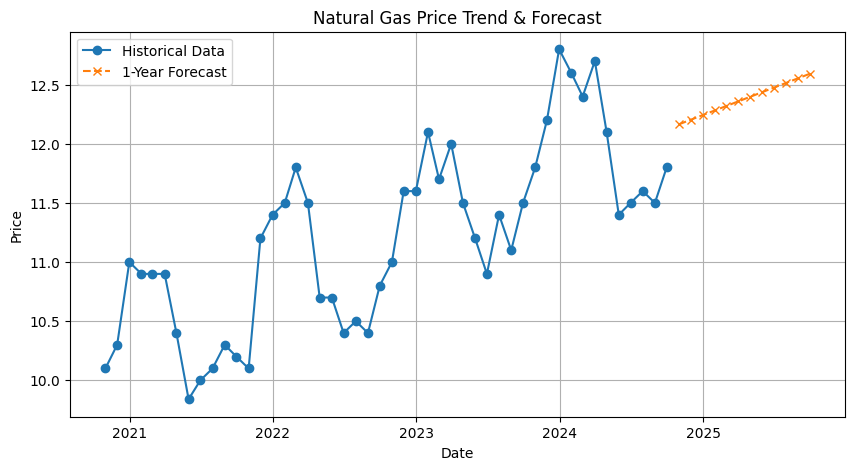

In [29]:
# 10. Plot everything
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Price'], label='Historical Data', marker='o')
plt.plot(future_df['Date'], future_df['Price'], '--', label='1-Year Forecast', marker='x')
plt.title('Natural Gas Price Trend & Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# 11. Example test
test_date = "2025-03-31"
print(f"Estimated price for {test_date}: {estimate_price(test_date):.2f}")

Estimated price for 2025-03-31: 12.36
